#  F2: Schwefel’s Problem

Minimum at -450

In [1]:
import sys
sys.path.append('../')
from functions import *
from PSO import *
import numpy as np
import matplotlib.pyplot as plt

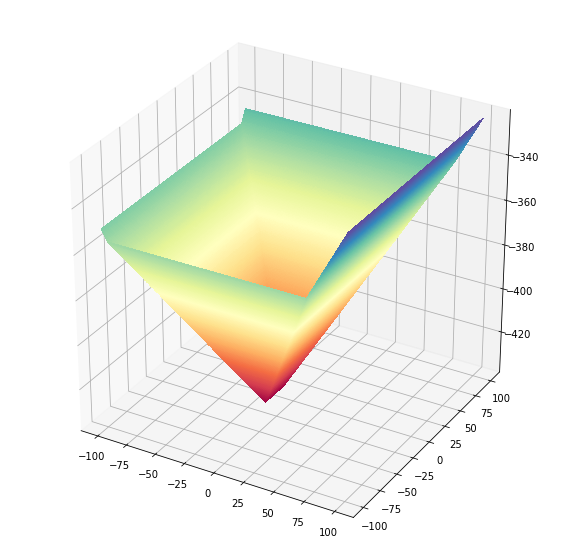

In [2]:
plot_fct(Schwefel_Problem)

In [3]:
class F2_Schwefel_Problem:
    
    nbFitness = 0
    
    def __init__(self, dim, bounds):
        self.dim = dim
        self.bounds=bounds
        F2_Schwefel_Problem.nbFitness = 0

    def fitness(self, x):
        F = abs(x[0])
        for i in range(0,x.shape[0]):
            z = x[i] - schwefel[i]
            F = np.maximum(F , abs(z))
        F2_Schwefel_Problem.nbFitness += 1
        return F + f_bias[1]

## Paremeter choices

### Number of particules

The particules browse the search space. The bigger the search space is, the more we need particules. 

For the dimension 50, we take 300 particules. 

For the dimention 500, we take 3000 particules.

### Inertia factor

The inertia factors allows controling the velocity. If we want a particule to explore more, we need a inertia factor greater than 1. If we want to particule to exploite more, it should be smaller than one. 

With this function, we can see we don't have local minimums, but a global one, we don't need to explore a lot, but to exploite each good solution. 

We will use a inertia factor of 0.2

### Self confidence 

The self confidence allows to take into account the best solution of the particule. 

As we don't have local minimums, we need to have the self confidence greater than the swarm confidence to allow intensification.

### Swarm confidence 

The self confidence allows to take into account the best solution of the swarm.

Here we want it to be smaller than the self confidence to allow intensification.

## Dimension 50

Best result -428.49578055483585
The number of function evaluations 0


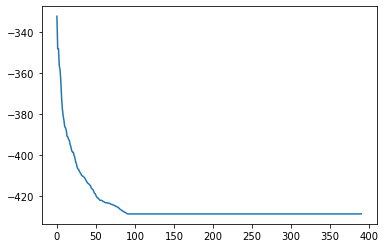

In [11]:
problem=F2_Schwefel_Problem(50, [-100,100])
swarm=Swarm(problem, numOfParticule=300, w=0.15, c1=1.2, c2=1.7)
optimize = Optimize(swarm, epsilon=0, N=300)
res = optimize.run()
print ('Best result ' + str(res[0][-1]))
print ('The number of function evaluations ' + str(res[1]))
plt.plot(res[0])
plt.show()

## Dimension 500